<a href="https://colab.research.google.com/github/OkelloAndrewPeters/datascience/blob/main/LinearRProject_1_LifeExpectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import all important libraries to use
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#loading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/OkelloAndrewPeters/datascience/main/LifeExpectancyData.csv')
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [2]:
#dealing categorical data (dropping columns with categorical data)
data = data.drop(columns = ["Country","Status"], axis = 1)

<Axes: >

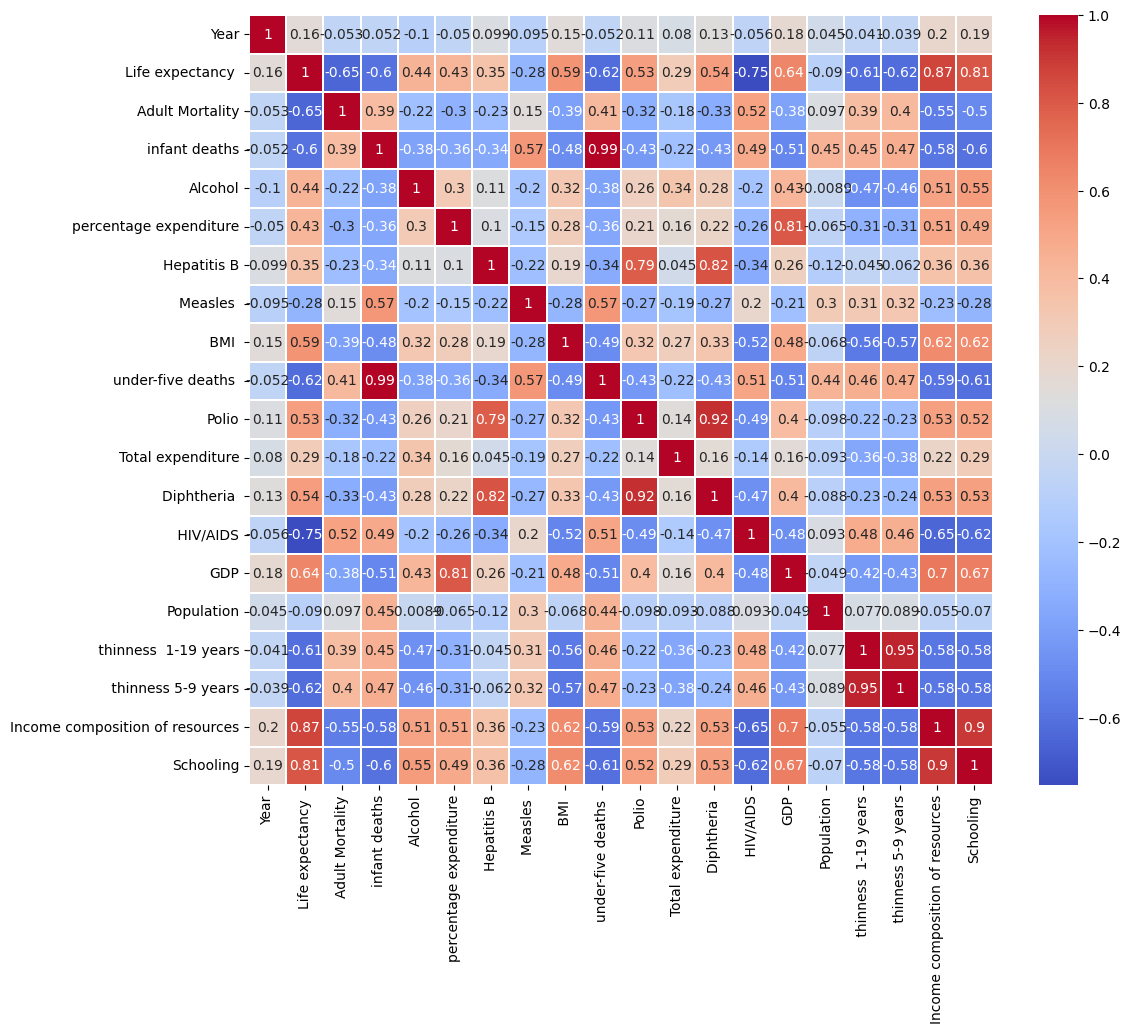

In [3]:
#selecting features through correlation analysis using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = data.corr(method = "spearman")
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap = "coolwarm", linewidth = 0.1, annot = True)

In [4]:
#from the above analysis features with < 0.5 corr are rejected
data = data.drop(columns = ['Year', 'Alcohol', 'percentage expenditure',
                            'Hepatitis B', 'Measles ', 'Total expenditure', 'Population'], axis =1)

In [5]:
data.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', ' BMI ',
       'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:

data.head()

Life expectancy   Adult Mortality  infant deaths   BMI   \
0              65.0            263.0             62   19.1   
1              59.9            271.0             64   18.6   
2              59.9            268.0             66   18.1   
3              59.5            272.0             69   17.6   
4              59.2            275.0             71   17.2   

   under-five deaths   Polio  Diphtheria    HIV/AIDS         GDP  \
0                  83    6.0         65.0        0.1  584.259210   
1                  86   58.0         62.0        0.1  612.696514   
2                  89   62.0         64.0        0.1  631.744976   
3                  93   67.0         67.0        0.1  669.959000   
4                  97   68.0         68.0        0.1   63.537231   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

In [7]:
#dealing with duplicates - checking for duplicates
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Length: 2938, dtype: bool

In [8]:
data.shape

(2938, 13)

In [9]:
#checking for null values
print(data.isnull().sum())

Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
 BMI                                34
under-five deaths                    0
Polio                               19
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [10]:
data.columns = data.columns.str.strip()
data["BMI"] = data["BMI"].fillna(data["BMI"].mean())
data["Polio"] = data["Polio"].fillna(data["Polio"].mean())
data["Diphtheria"] = data["Diphtheria"].fillna(data["Diphtheria"].mean())
data["GDP"] = data["GDP"].fillna(data["GDP"].mean())
data["thinness  1-19 years"] = data["thinness  1-19 years"].fillna(data["thinness  1-19 years"].mean())
data["thinness 5-9 years"] = data["thinness 5-9 years"].fillna(data["thinness 5-9 years"].mean())
data["Income composition of resources"] = data["Income composition of resources"].fillna(data["Income composition of resources"].mean())
data["Schooling"] = data["Schooling"].fillna(data["Schooling"].mean())

In [11]:
#checking if null values have been replaced with mean
print(data.isnull().sum())

Life expectancy                    10
Adult Mortality                    10
infant deaths                       0
BMI                                 0
under-five deaths                   0
Polio                               0
Diphtheria                          0
HIV/AIDS                            0
GDP                                 0
thinness  1-19 years                0
thinness 5-9 years                  0
Income composition of resources     0
Schooling                           0
dtype: int64


In [12]:
#remove null values for adult mortality and life expec
data["Life expectancy"] = data["Life expectancy"].fillna(data["Life expectancy"].mean())
data["Adult Mortality"] = data["Adult Mortality"].fillna(data["Adult Mortality"].mean())

In [13]:
#checking if null values have been replaced with mean
print(data.isnull().sum())

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
BMI                                0
under-five deaths                  0
Polio                              0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


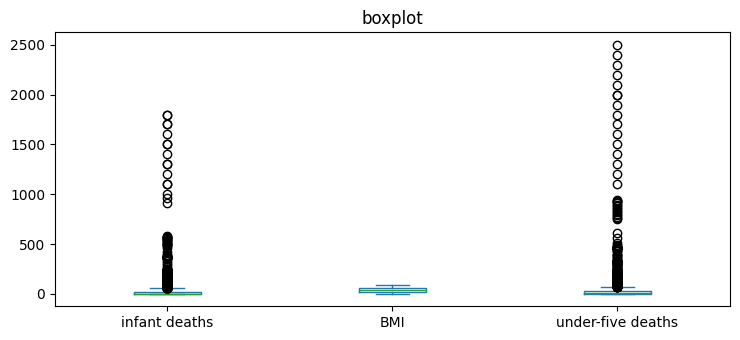

In [14]:
#BOX PLOTS FOR UNIVARIATE ANALYSIS

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot the data
ax = data[['infant deaths', 'BMI', 'under-five deaths']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

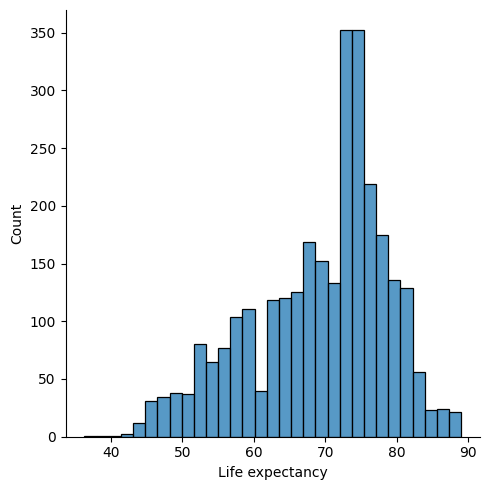

In [15]:
from scipy.stats import norm
sns.displot(data["Life expectancy"])

In [16]:
data["Life expectancy"].skew()

-0.6396932035944191

In [17]:
data["Life expectancy"].kurt()

-0.2250274664973353

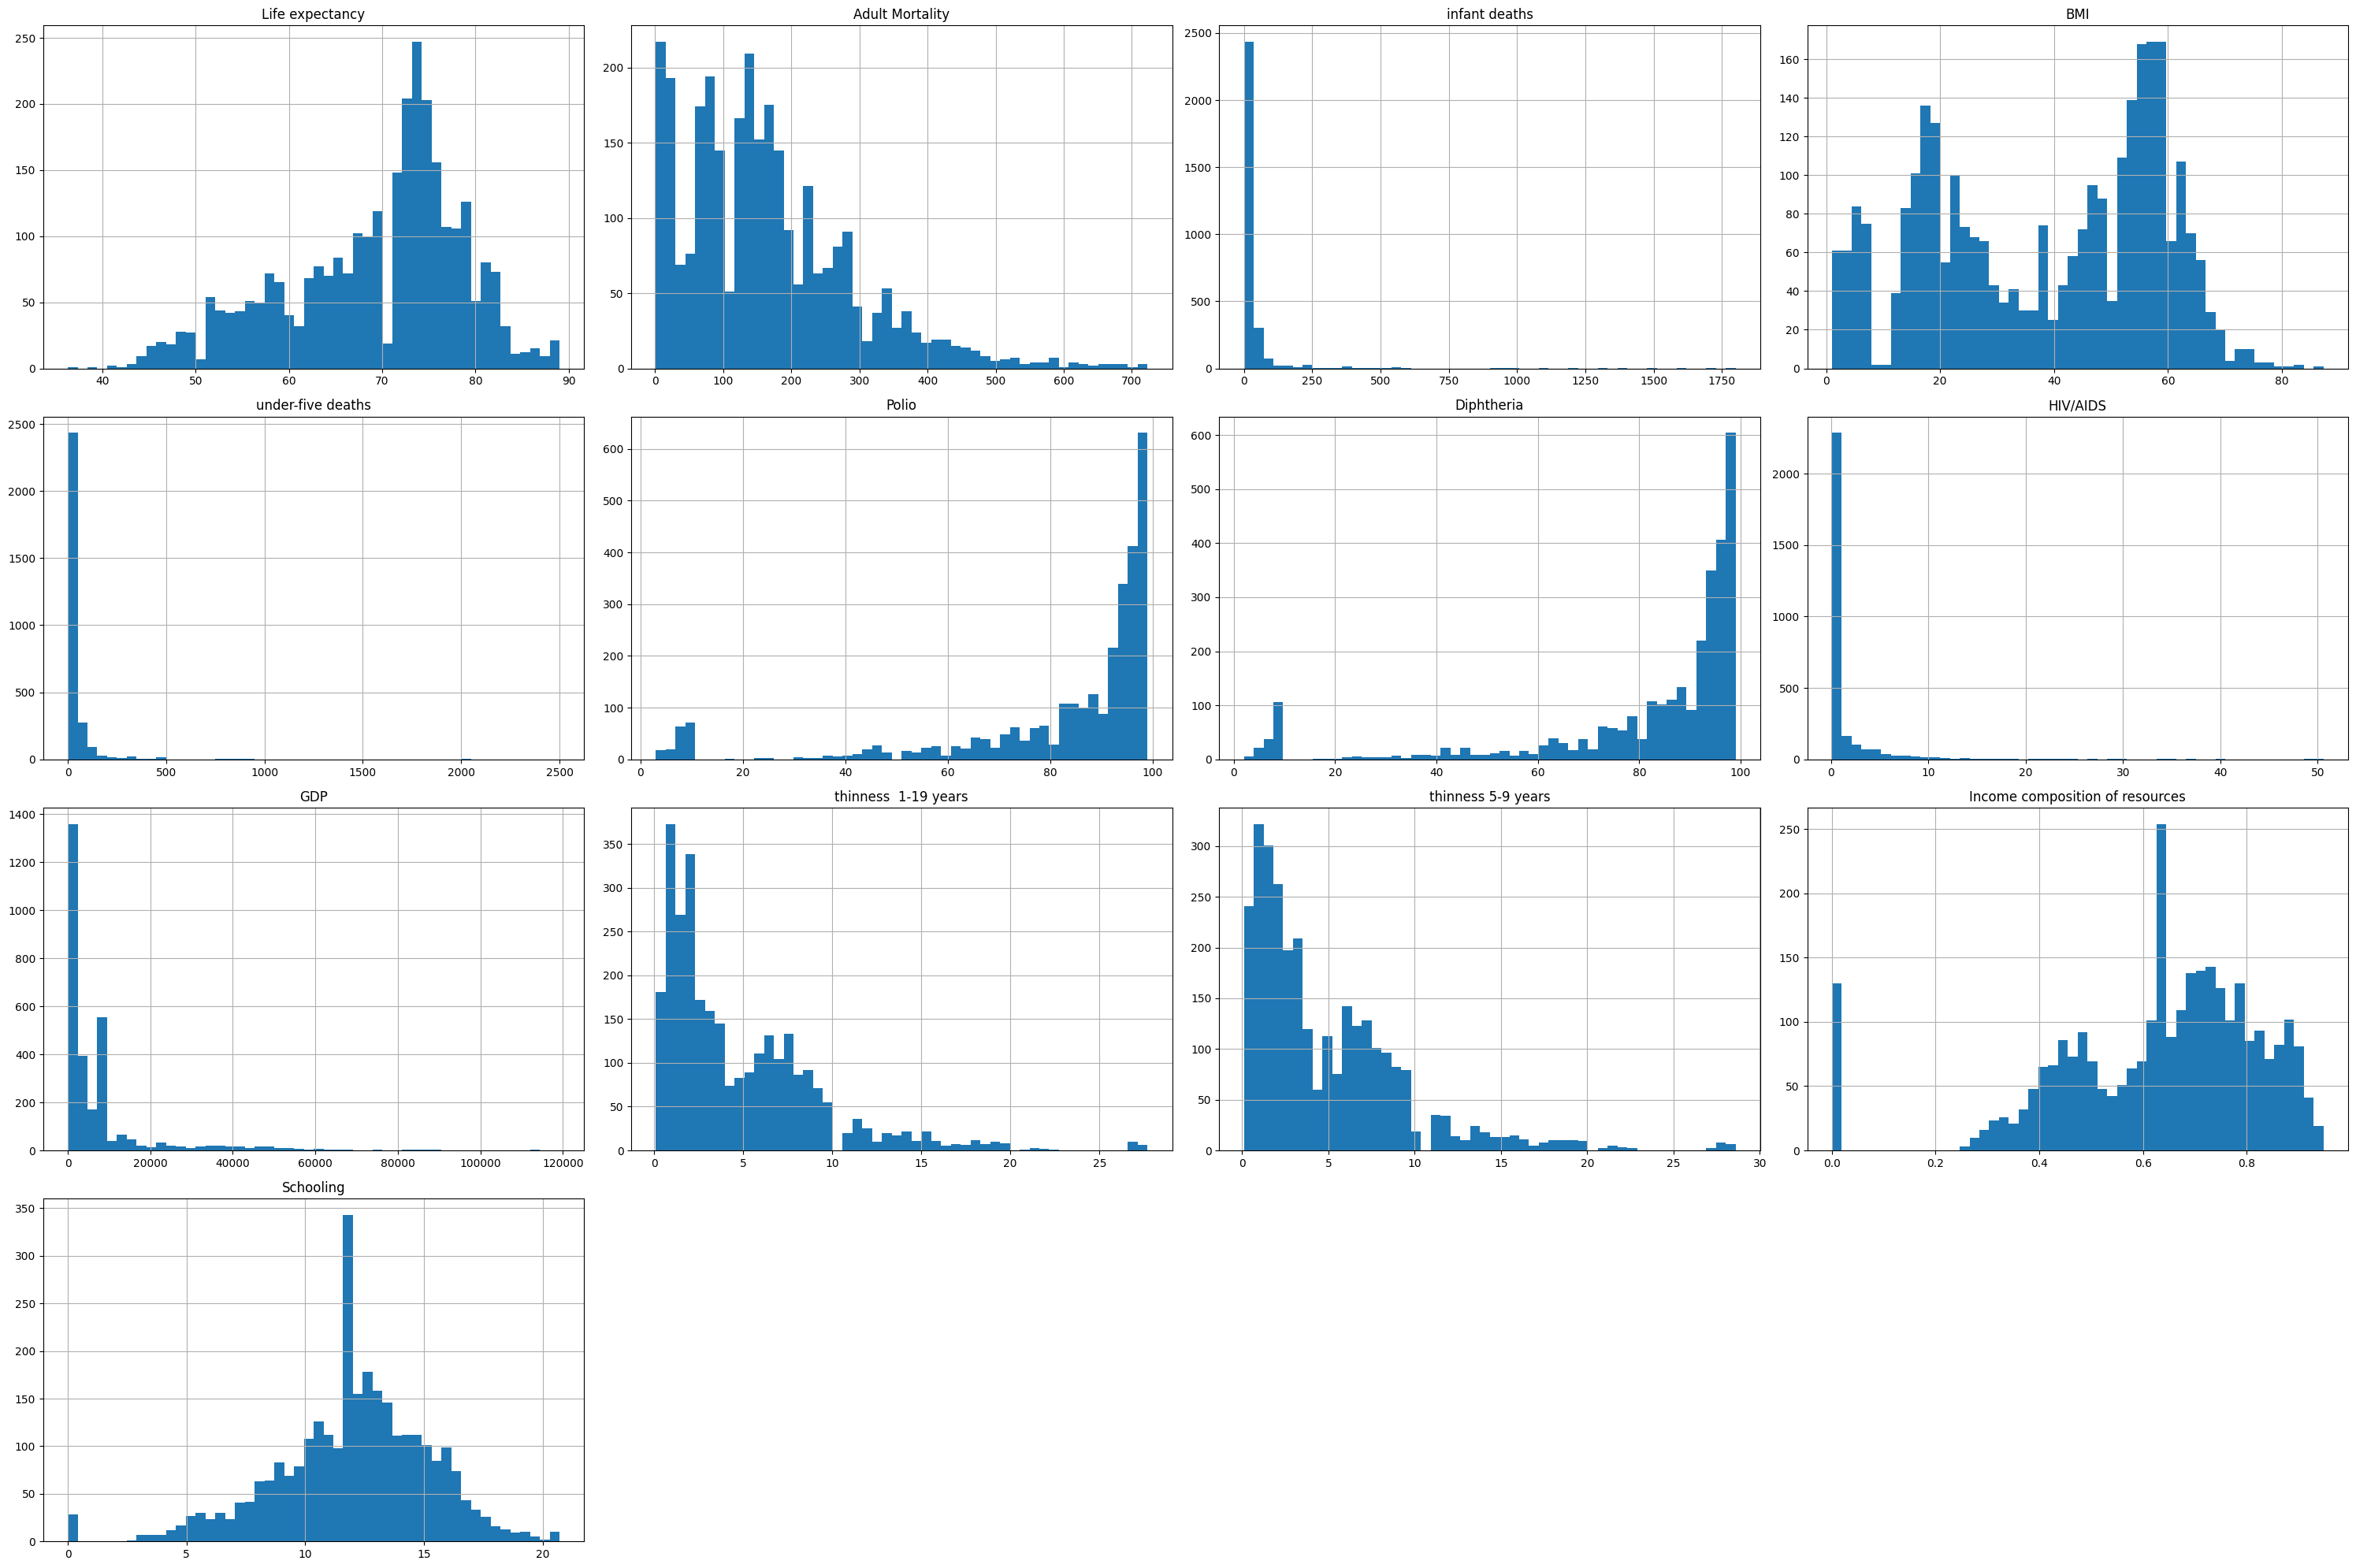

In [18]:
#bivariate analysis
data.hist(bins=50, figsize=(30,20));

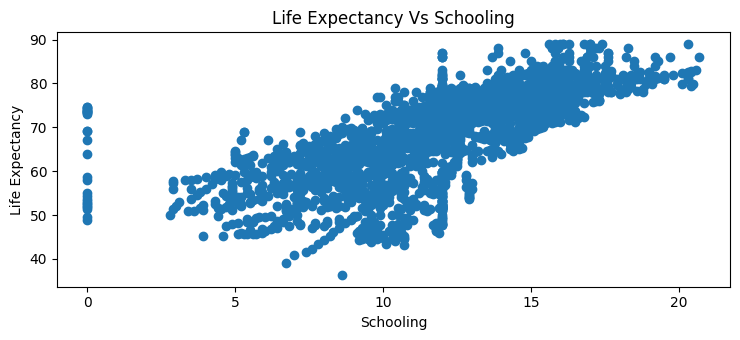

In [19]:
#plotting a scatter plot for Life Expectancy and Schooling
x = data["Schooling"]
y = data["Life expectancy"]

#create a scatter plot
plt.scatter(x, y)

plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Vs Schooling')

#show the plot
plt.show()

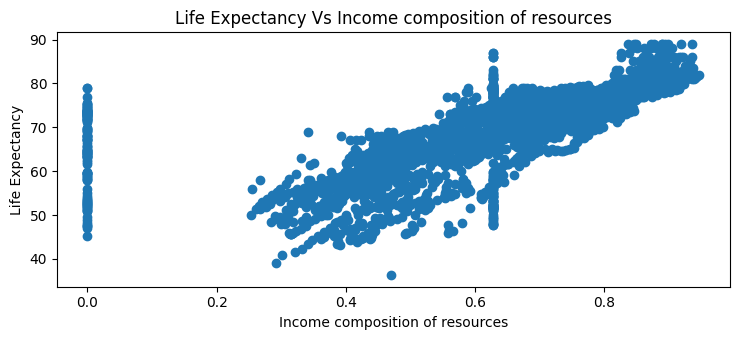

In [20]:
#plotting a scatter plot for Life Expectancy and Schooling
x = data["Income composition of resources"]
y = data["Life expectancy"]

#create a scatter plot
plt.scatter(x, y)

plt.xlabel('Income composition of resources')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Vs Income composition of resources')

#show the plot
plt.show()

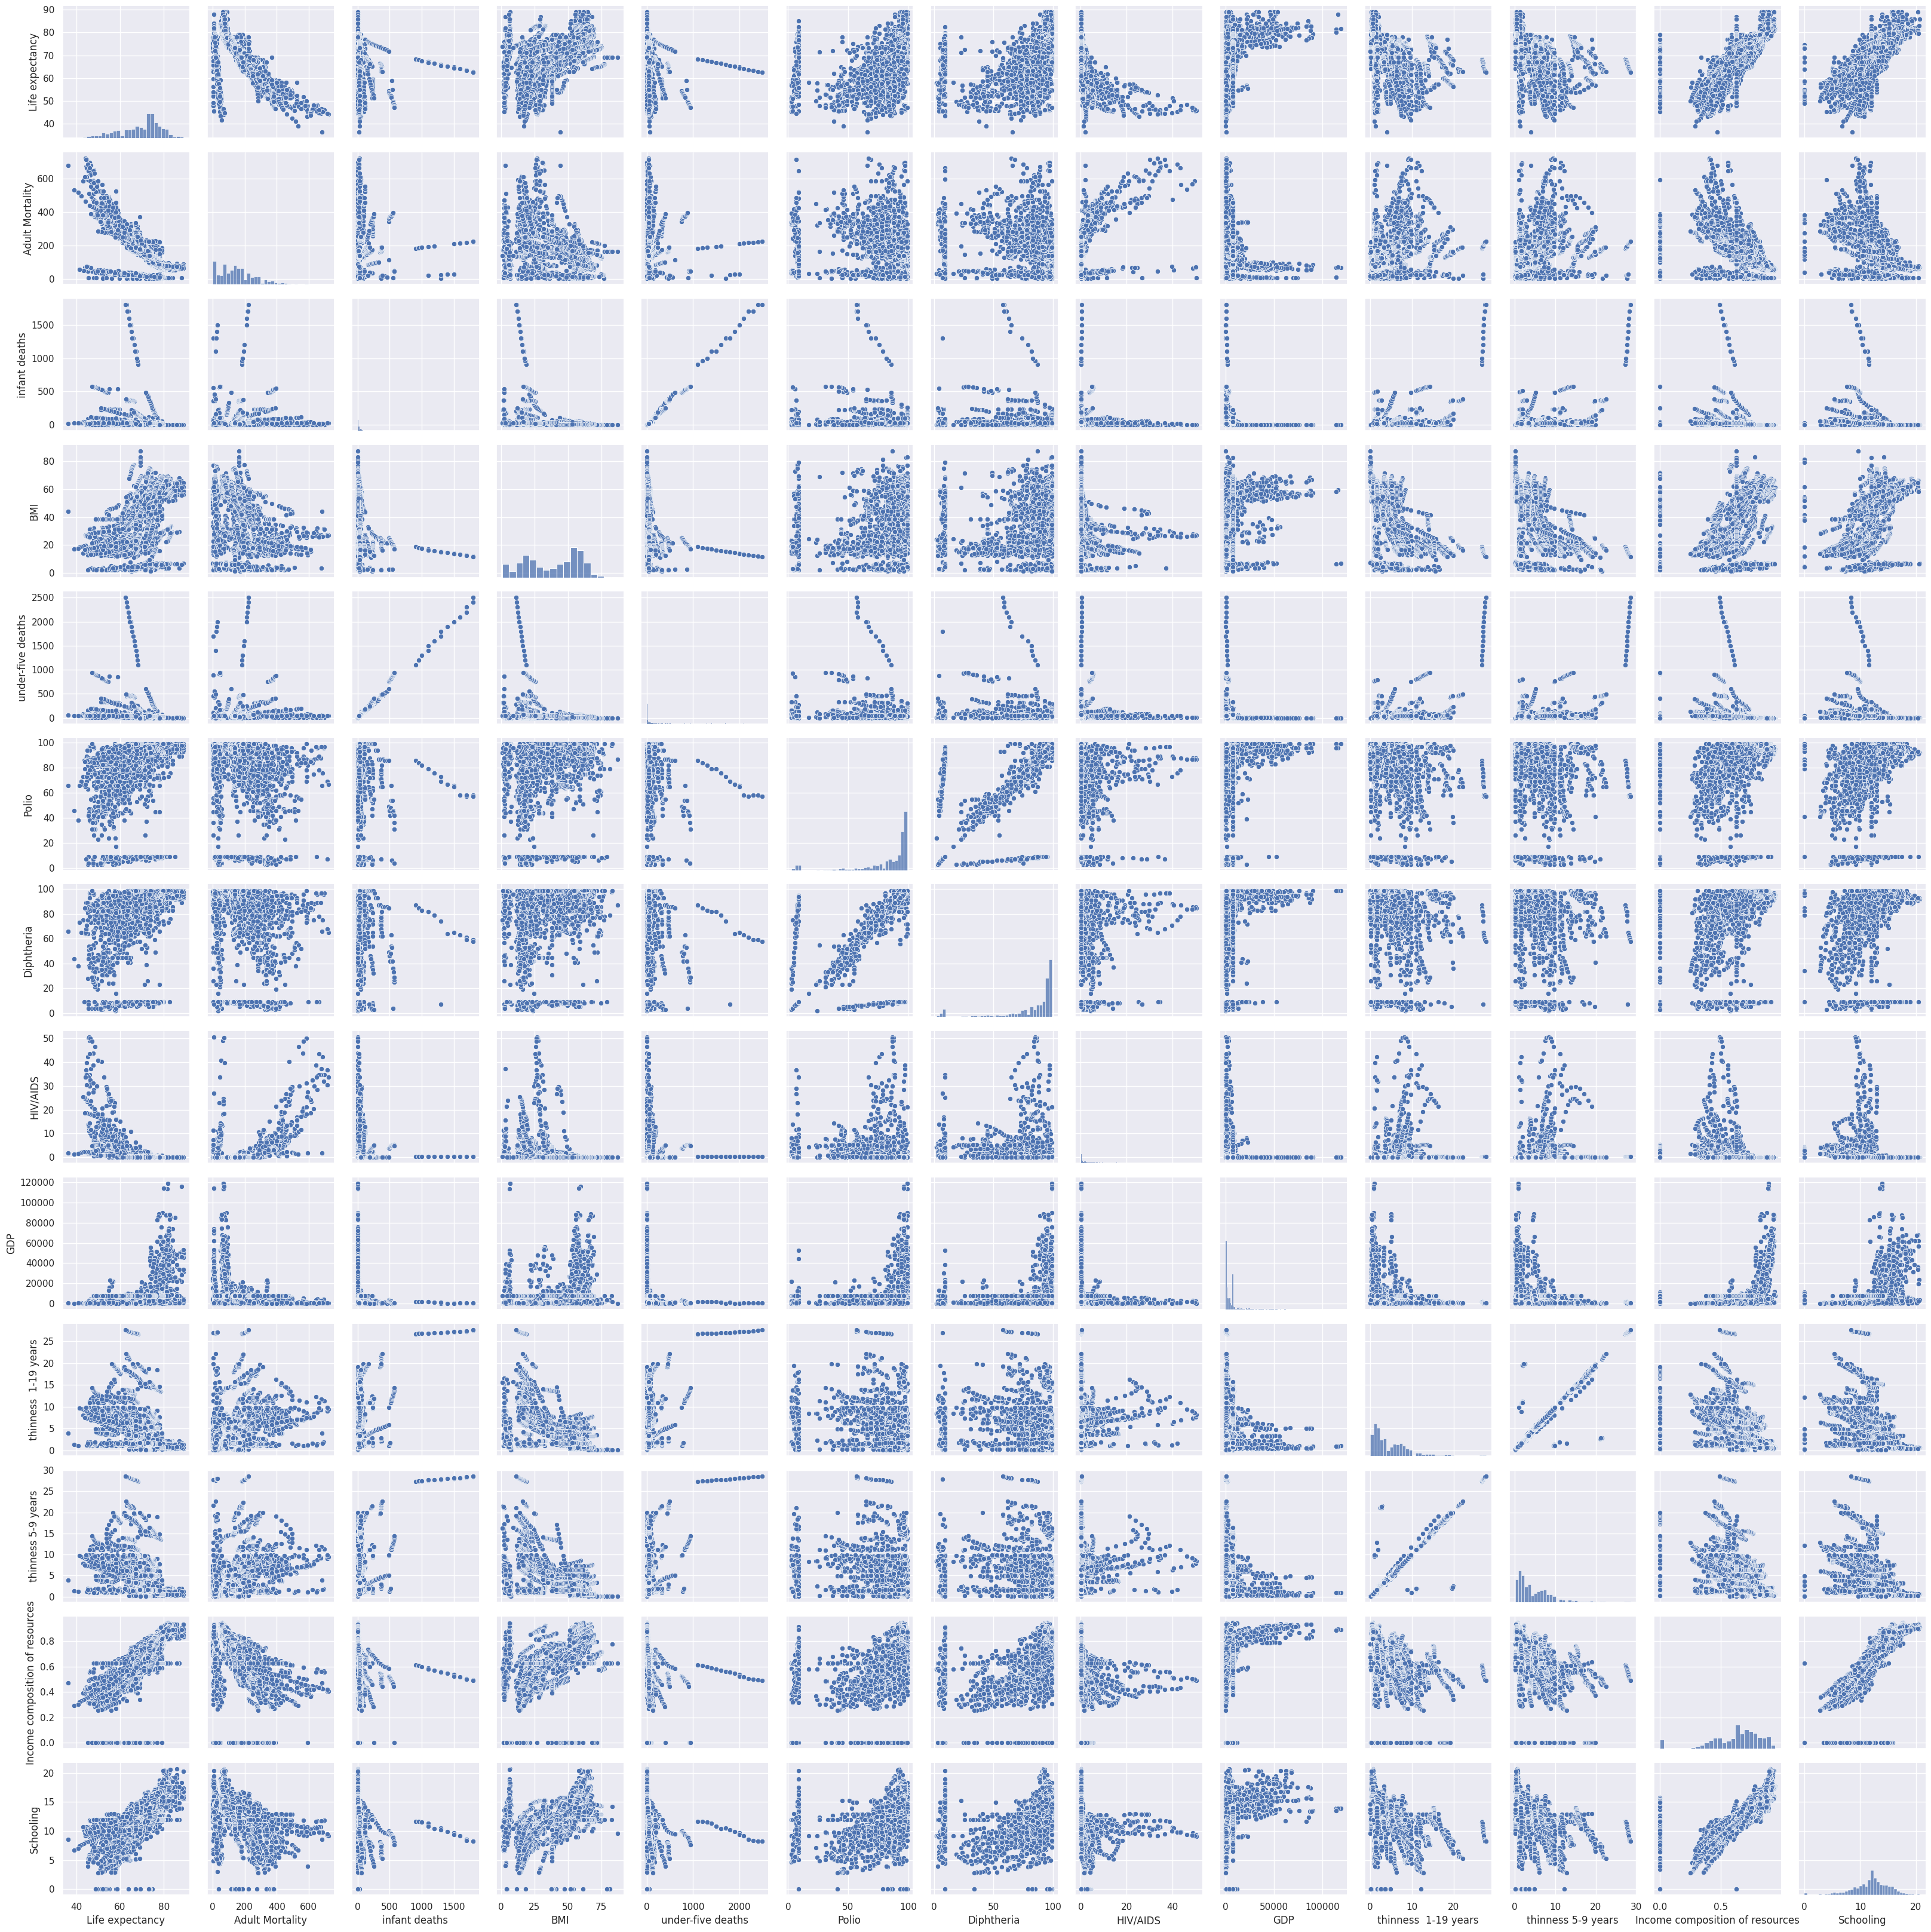

In [21]:
sns.set()
cols = ['Life expectancy', 'Adult Mortality', 'infant deaths', 'BMI',
       'under-five deaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 'GDP',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling']
sns.pairplot(data[cols], height = 2.5)
plt.show()

<Axes: >

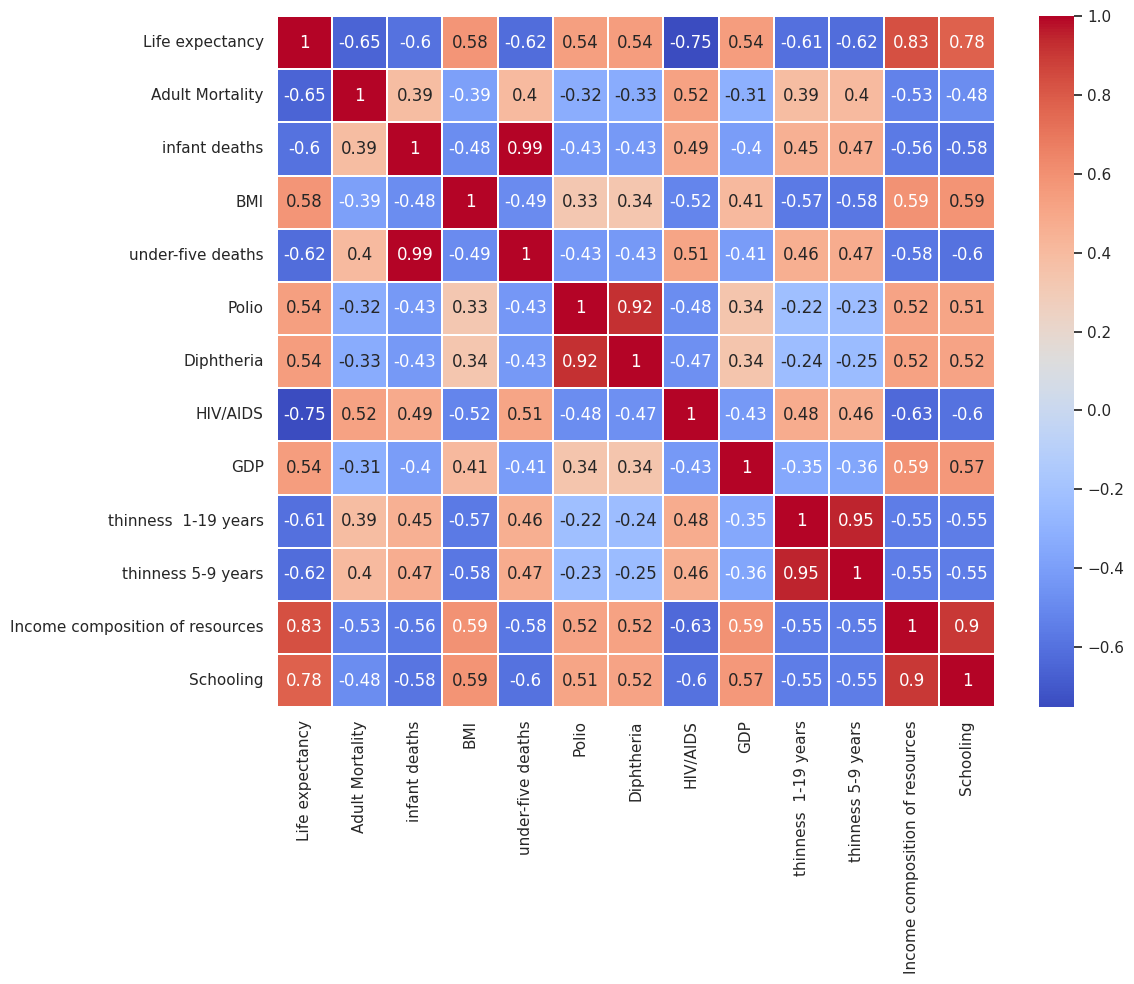

In [22]:
#correlation matrix MULTIVARIATE ANALYSIS
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = data.corr(method = "spearman")
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap = "coolwarm", linewidth = 0.1, annot = True)

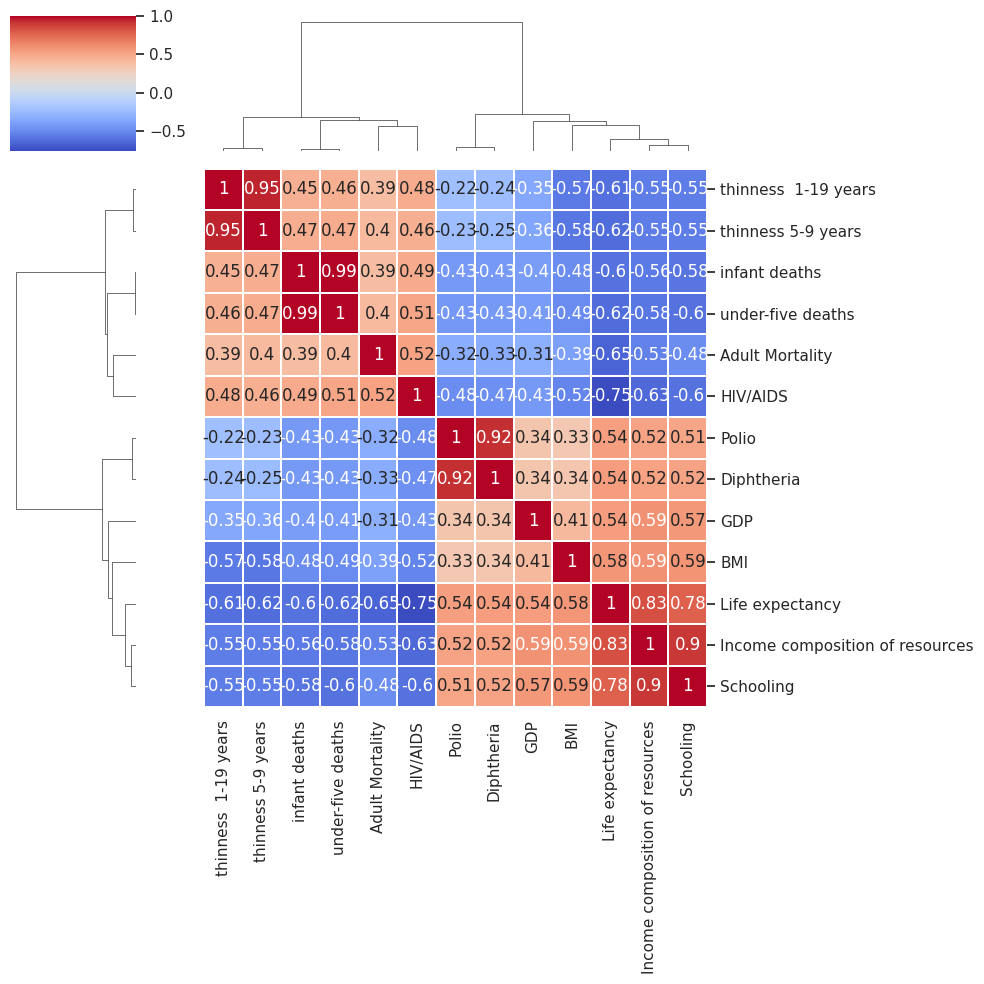

In [23]:
#correlation matrix
corrmat = data.corr(method='spearman')
cg = sns.clustermap(corrmat, cmap="coolwarm", linewidths=0.1, annot = True);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

In [24]:
data.columns

Index(['Life expectancy', 'Adult Mortality', 'infant deaths', 'BMI',
       'under-five deaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 'GDP',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [25]:
#splitting the data into training and testing sets

X = (data.drop(columns = ['Life expectancy'], axis = 1))

y = data['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

#create a model
model = LinearRegression()

#fit the model
model.fit(X_train, y_train)

#predicting Life Expectancy using the model
y_pred = model.predict(X_test)

#print the coefficients and intercepts
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

#calculate the error
from sklearn.metrics import mean_squared_error, r2_score

print("Mean Squared Error: %.2f" % mean_squared_error(y_test, y_pred))
print("R2-Score Value: %.2f" % r2_score(y_test, y_pred))

Coefficients:  [-2.04331792e-02  9.87789952e-02  4.71565223e-02 -7.41976135e-02
  2.75688291e-02  3.43621179e-02 -4.61144213e-01  6.26741501e-05
 -9.02628226e-02 -2.29763141e-02  5.26736649e+00  7.36517255e-01]
Intercept:  54.572601141830575
Mean Squared Error: 17.12
R2-Score Value: 0.81
